# Initial Setting

In [1]:
%matplotlib inline

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20200426)
tf.random.set_seed(20200426)

print("tensorflow version : " + tf.__version__)

tensorflow version : 2.3.1


# Create input data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_val.shape: ', x_val.shape)
print('y_val.shape: ', y_val.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train = x_train.reshape((50000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_val = x_val.reshape((10000, 28, 28, 1))
x_val = x_val.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train.shape:  (50000, 28, 28)
y_train.shape:  (50000,)
x_val.shape:  (10000, 28, 28)
y_val.shape:  (10000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


# Create deep learning layer

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(rate=0.3, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

# Trainning

Epoch 1/10
196/196 [==============================] - 24s 121ms/step - loss: 0.4020 - accuracy: 0.8811 - val_loss: 0.1231 - val_accuracy: 0.9631
Epoch 2/10
196/196 [==============================] - 25s 128ms/step - loss: 0.0913 - accuracy: 0.9725 - val_loss: 0.0854 - val_accuracy: 0.9759
Epoch 3/10
196/196 [==============================] - 24s 123ms/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 0.0657 - val_accuracy: 0.9816
Epoch 4/10
196/196 [==============================] - 25s 125ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0670 - val_accuracy: 0.9795
Epoch 5/10
196/196 [==============================] - 23s 119ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.0518 - val_accuracy: 0.9852
Epoch 6/10
196/196 [==============================] - 24s 121ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0608 - val_accuracy: 0.9824
Epoch 7/10
196/196 [==============================] - 23s 119ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0423 - val_ac

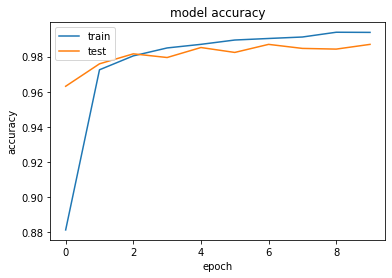

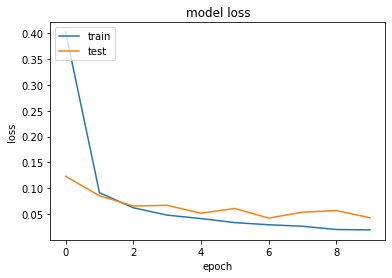

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=256, epochs=10)

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate

In [ ]:
model.evaluate(x_test, y_test)

# Save the model

In [5]:
#model.save('models\\cnn_mnist.h5')
model.save('models/cnn_mnist.h5')

print(model.input)
print(model.output)

Tensor("reshape_input:0", shape=(None, 784), dtype=float32)
Tensor("softmax/Softmax:0", shape=(None, 10), dtype=float32)


# Predict

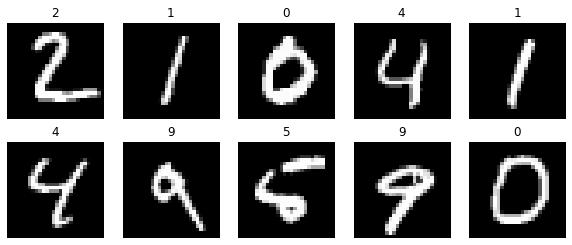

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((len(x_train), 28*28)).astype('float32')
x_test = x_test.reshape((len(x_test), 28*28)).astype('float32')
x_train = x_train / 255
x_test = x_test / 255

#model = models.load_model('models\\cnn_mnist.h5')
model = models.load_model('models/cnn_mnist.h5')

plt.figure(figsize=(10, 4))
num = 0

while num < 2 * 5:
    num += 1
    plt.subplot(2, 5, num)
    plt.imshow(x_test[num].reshape(28, 28), cmap="gray")
    plt.axis('off')
    
    x = x_test[num]
    x = x.reshape(1, len(x))
    plt.title(np.argmax(model.predict(x)))